## Engineering mixed variables

Mixed variables are variables that contain number and label in each observation, or number or label in different observations. Example: area code in Canada may have both number and label such as M4Y1R5; or Number of credit accounts could be (1-100, U, T, M) where U = unknown, T = unverified, M = unmatched.

### How can we deal with mixed variables?

- Split a mixed variable into 1 var with number and 1 var with label.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv("../data/titanic.csv", usecols=["ticket", "cabin", "survived"])
data.head()

,survived,ticket,cabin
0,1,24160,B5
1,1,113781,C22
2,0,113781,C22
3,0,113781,C22
4,0,113781,C22


In [3]:
data["cabin"].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [4]:
data["ticket"].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

We can observe that:

- `cabin`: number and label in each observation.
- `ticket`: number or label or both number and label for different observations.

In [5]:
# Extract numerical and categorical part for cabin
data["cabin_num"] = data["cabin"].str.extract("(\d+)") # capture numerical part
data["cabin_cat"] = data["cabin"].str[0] # capture the first letter

data[["cabin", "cabin_num", "cabin_cat"]].head()

,cabin,cabin_num,cabin_cat
0,B5,5,B
1,C22,22,C
2,C22,22,C
3,C22,22,C
4,C22,22,C


In [7]:
# Extract numerical and categorical part for ticket

data["ticket_num"] = data["ticket"].apply(lambda s: s.split()[-1])
data["ticket_num"] = pd.to_numeric(data["ticket_num"],
                                   errors="coerce",
                                   downcast="integer")

# Extract the first part of ticket as category
data["ticket_cat"] = data["ticket"].apply(lambda s: s.split()[0])
data["ticket_cat"] = np.where(data["ticket_cat"].str.isdigit(), 
                              np.nan,
                              data["ticket_cat"])

data[["ticket", "ticket_num", "ticket_cat"]].head()

,ticket,ticket_num,ticket_cat
0,24160,24160.0,NaN
1,113781,113781.0,NaN
2,113781,113781.0,NaN
3,113781,113781.0,NaN
4,113781,113781.0,NaN


In [8]:
data["ticket_cat"].unique()

array([nan, 'PC', 'W.E.P.', 'WE/P', 'F.C.', 'P/PP', 'C.A.', 'C.A./SOTON',
       'S.O.P.', 'F.C.C.', 'SC/AH', 'W./C.', 'S.O.C.', 'SC/PARIS',
       'S.W./PP', 'W/C', 'SCO/W', 'SO/C', 'SC/Paris', 'SC', 'S.O./P.P.',
       'S.C./PARIS', 'SC/A.3', 'SW/PP', 'CA', 'SOTON/O2', 'C',
       'SOTON/O.Q.', 'A/4', 'PP', 'A/5', 'A./5.', 'A/5.', 'SOTON/OQ',
       'S.P.', 'SC/A4', 'AQ/3.', 'STON/O2.', 'A.', 'LINE', 'STON/O',
       'AQ/4', 'A/S', 'A.5.', 'A4.', 'A/4.', 'Fa', 'S.C./A.4.', 'LP',
       'CA.', 'STON/OQ.'], dtype=object)

<Axes: >

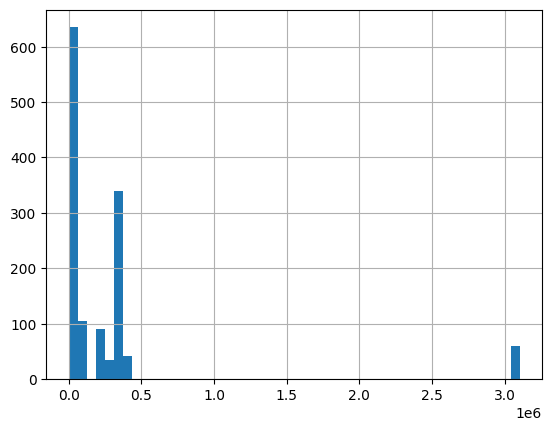

In [9]:
data["ticket_num"].hist(bins=50)